In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
df = pd.read_csv('D:\\pythonProject\\CreditCardDefaulter\\Data\\final_df.csv',index_col=False)
pd.set_option('display.max_columns', 50)

ID: ID of each client

LIMIT_BAL: Amount of given credit in NT dollars (includes individual and family/supplementary credit

SEX: Gender (1=male, 2=female)

EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)

MARRIAGE: Marital status (1=married, 2=single, 3=others)

AGE: Age in years

PAY_1: Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, … 8=payment delay for eight months, 9=payment delay for nine months and above)

PAY_2: Repayment status in August, 2005 (scale same as above)

PAY_3: Repayment status in July, 2005 (scale same as above)

PAY_4: Repayment status in June, 2005 (scale same as above)

PAY_5: Repayment status in May, 2005 (scale same as above)

PAY_6: Repayment status in April, 2005 (scale same as above)

BILL_AMT1: Amount of bill statement in September, 2005 (NT dollar)

BILL_AMT2: Amount of bill statement in August, 2005 (NT dollar)

BILL_AMT3: Amount of bill statement in July, 2005 (NT dollar)

BILL_AMT4: Amount of bill statement in June, 2005 (NT dollar)

BILL_AMT5: Amount of bill statement in May, 2005 (NT dollar)

BILL_AMT6: Amount of bill statement in April, 2005 (NT dollar)

PAY_AMT1: Amount of previous payment in September, 2005 (NT dollar)

PAY_AMT2: Amount of previous payment in August, 2005 (NT dollar)

PAY_AMT3: Amount of previous payment in July, 2005 (NT dollar)

PAY_AMT4: Amount of previous payment in June, 2005 (NT dollar)

PAY_AMT5: Amount of previous payment in May, 2005 (NT dollar)

PAY_AMT6: Amount of previous payment in April, 2005 (NT dollar)

default.payment.next.month: Default payment (1=yes, 0=no)

In [3]:
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,20000.0,2,2,1,24,2,2,0,0,0,0,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,120000.0,2,2,2,26,0,2,0,0,0,2,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,90000.0,2,2,2,34,0,0,0,0,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,50000.0,2,2,1,37,0,0,0,0,0,0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,50000.0,1,2,1,57,0,0,0,0,0,0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [4]:
df.tail()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
29995,220000.0,1,3,1,39,0,0,0,0,0,0,188948.0,192815.0,208365.0,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0
29996,150000.0,1,3,2,43,0,0,0,0,0,0,1683.0,1828.0,3502.0,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0
29997,30000.0,1,2,2,37,4,3,2,0,0,0,3565.0,3356.0,2758.0,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1
29998,80000.0,1,3,1,41,1,0,0,0,0,0,-1645.0,78379.0,76304.0,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1
29999,50000.0,1,2,1,46,0,0,0,0,0,0,47929.0,48905.0,49764.0,36535.0,32428.0,15313.0,2078.0,1800.0,1430.0,1000.0,1000.0,1000.0,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   LIMIT_BAL  30000 non-null  float64
 1   SEX        30000 non-null  int64  
 2   EDUCATION  30000 non-null  int64  
 3   MARRIAGE   30000 non-null  int64  
 4   AGE        30000 non-null  int64  
 5   PAY_1      30000 non-null  int64  
 6   PAY_2      30000 non-null  int64  
 7   PAY_3      30000 non-null  int64  
 8   PAY_4      30000 non-null  int64  
 9   PAY_5      30000 non-null  int64  
 10  PAY_6      30000 non-null  int64  
 11  BILL_AMT1  30000 non-null  float64
 12  BILL_AMT2  30000 non-null  float64
 13  BILL_AMT3  30000 non-null  float64
 14  BILL_AMT4  30000 non-null  float64
 15  BILL_AMT5  30000 non-null  float64
 16  BILL_AMT6  30000 non-null  float64
 17  PAY_AMT1   30000 non-null  float64
 18  PAY_AMT2   30000 non-null  float64
 19  PAY_AMT3   30000 non-null  float64
 20  PAY_AM

In [6]:
df.describe()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.00000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,167484.322667,1.603733,1.842267,1.557267,35.485500,0.356767,0.320033,0.304067,0.258767,0.22150,0.226567,51223.330900,49179.075167,4.701315e+04,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,129747.661567,0.489129,0.744494,0.521405,9.217904,0.760594,0.801727,0.790589,0.761113,0.71772,0.715438,73635.860576,71173.768783,6.934939e+04,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,10000.000000,1.000000,1.000000,1.000000,21.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,3558.750000,2984.750000,2.666250e+03,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,22381.500000,21200.000000,2.008850e+04,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,67091.000000,64006.250000,6.016475e+04,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,1000000.000000,2.000000,4.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.00000,8.000000,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [7]:
discrete_feature=[feature for feature in df.columns if len(df[feature].unique())<15 and feature not in 'default']
continous_feature=[feature for feature in df.columns if len(df[feature].unique())>15]

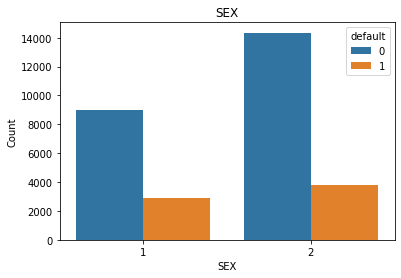

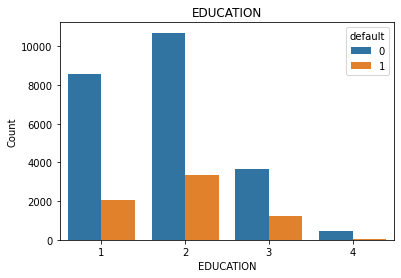

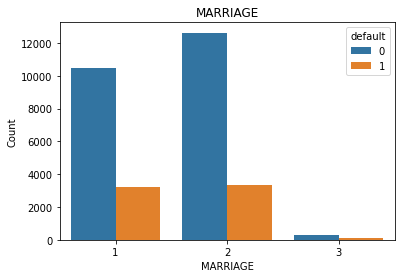

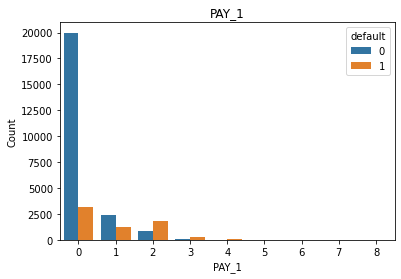

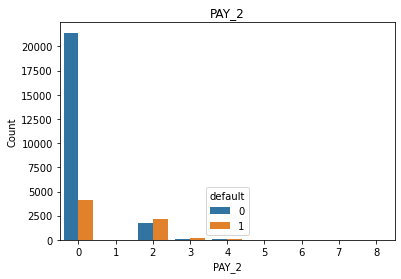

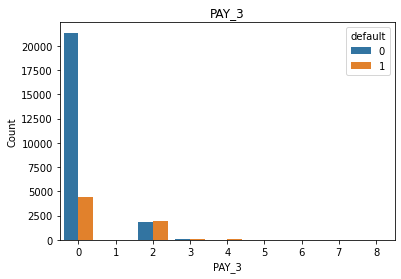

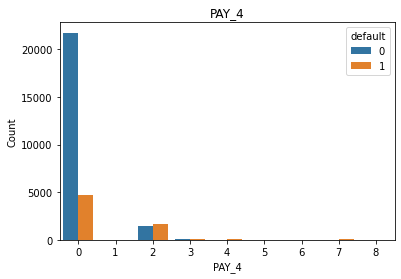

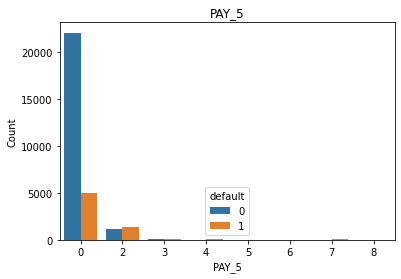

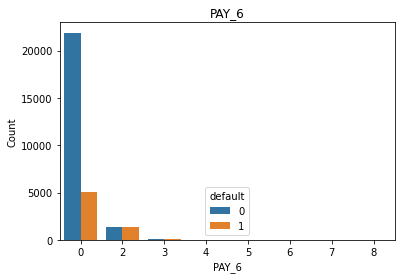

In [8]:
for feature in discrete_feature:
    sns.countplot(x = feature, hue = 'default', data = df)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()

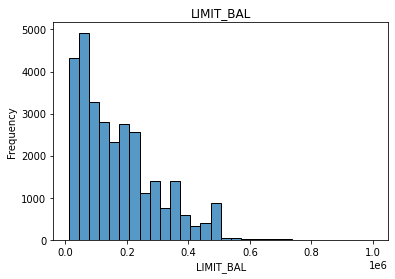

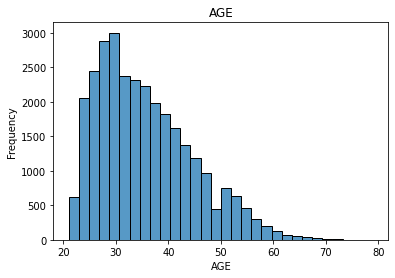

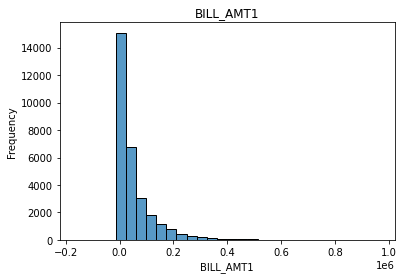

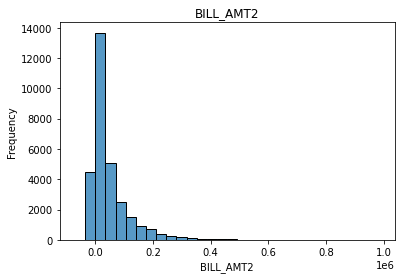

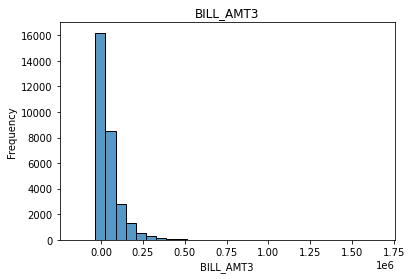

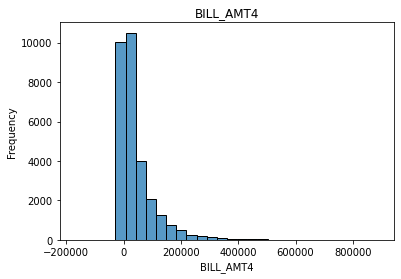

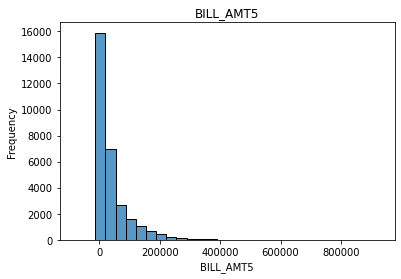

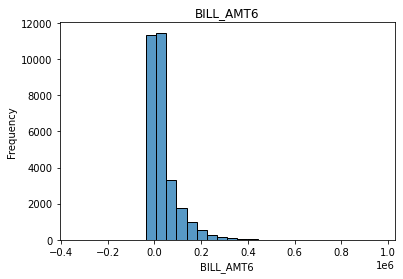

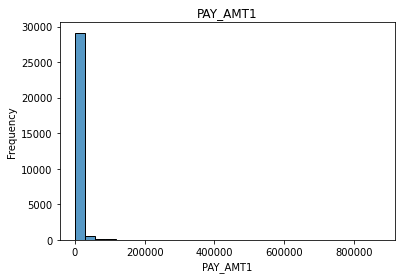

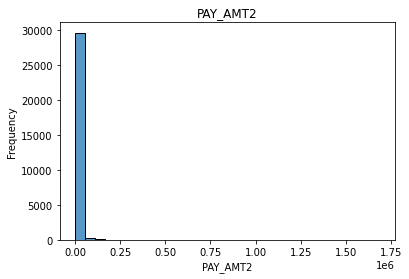

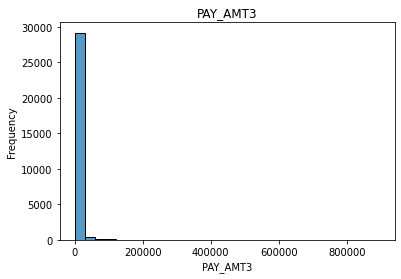

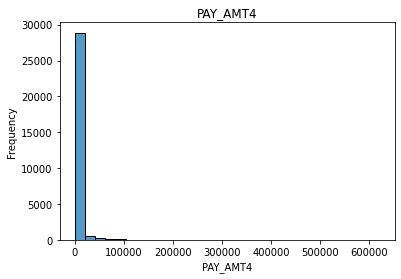

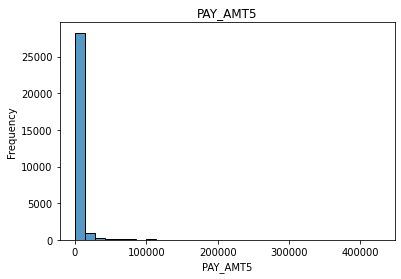

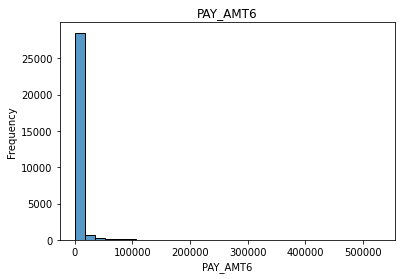

In [9]:
for feature in continous_feature:
    sns.histplot(x = feature,data = df, bins = 30)
    plt.xlabel(feature)
    plt.ylabel("Frequency")
    plt.title(feature)
    plt.show()

<AxesSubplot:>

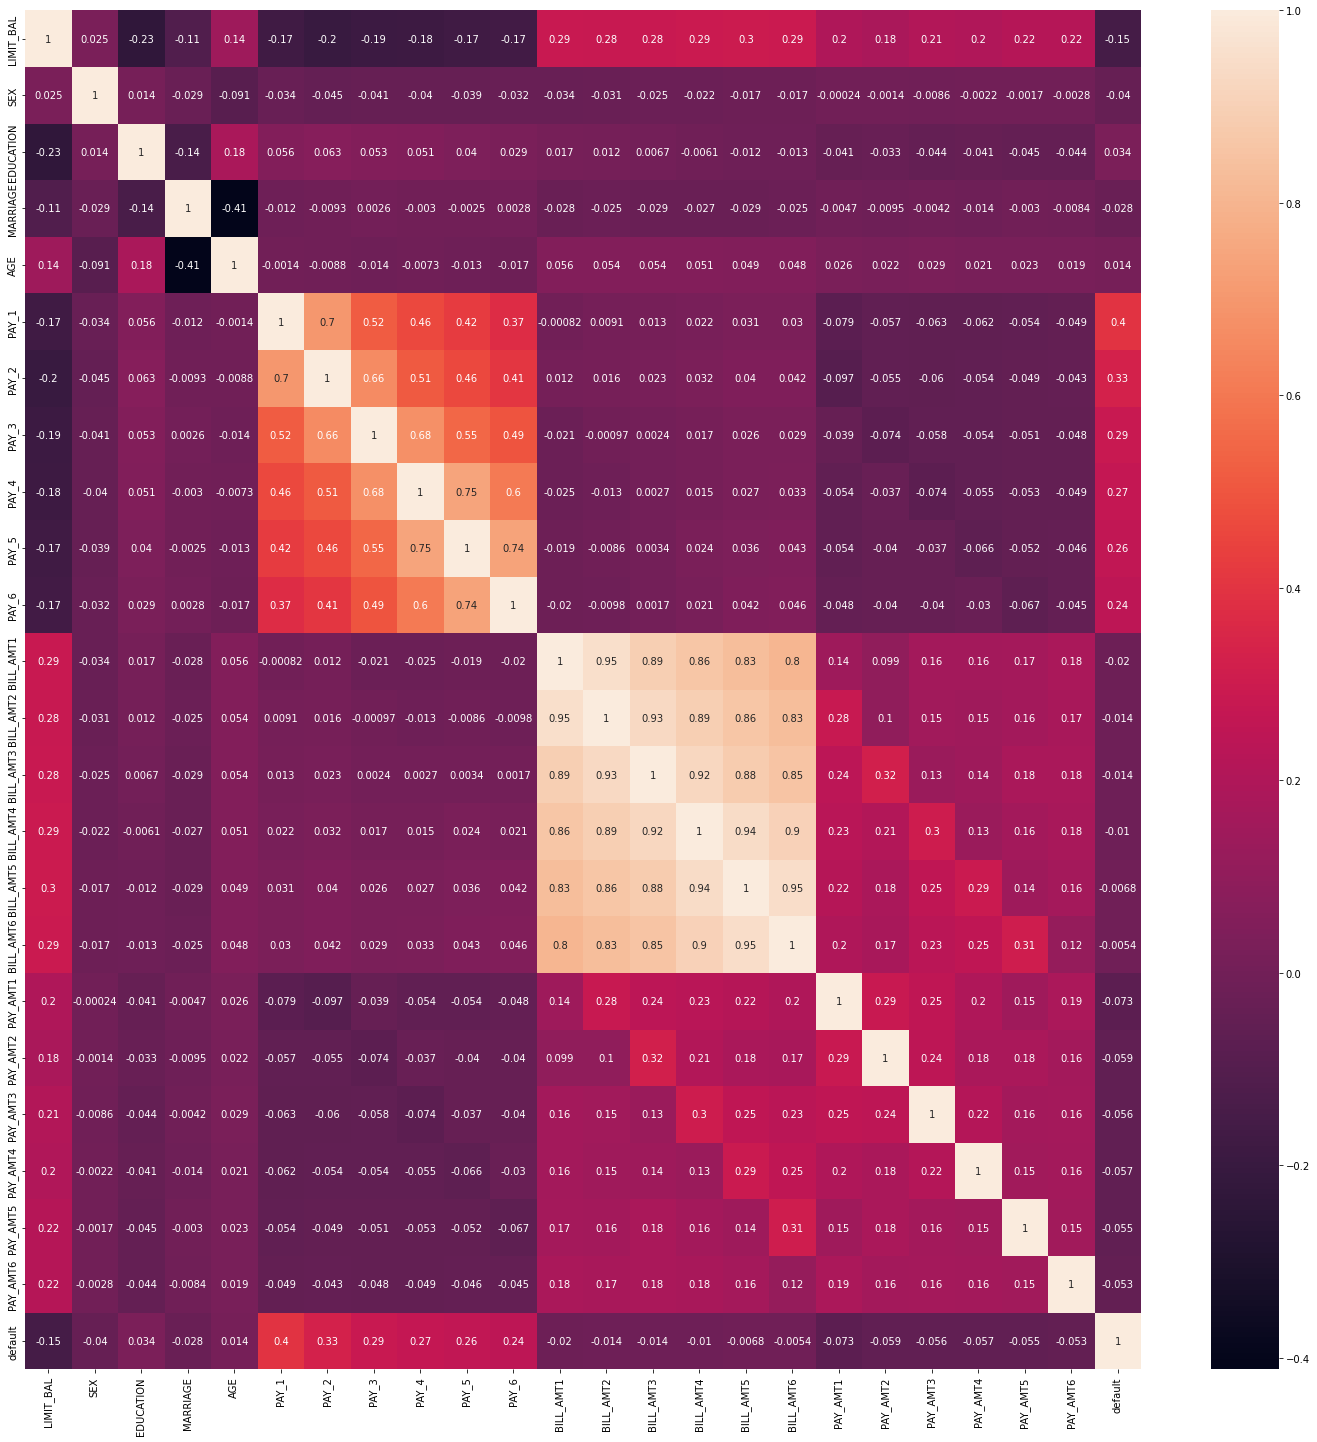

In [10]:
plt.figure(figsize = (25,25))
sns.heatmap(df.corr(),annot = True)

In [11]:
#log transformation
for feature in ['BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6','PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']:
    df[feature]=np.log(df[feature] + 1 - min(df[feature]))

In [12]:
x = df.drop('default', axis=1)
y = df['default']

In [13]:
#balancing the dataset
from imblearn.over_sampling import SMOTE

smote = SMOTE()

x, y = smote.fit_resample(x, y)


<AxesSubplot:>

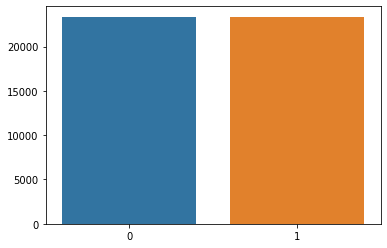

In [14]:
sns.barplot(y.value_counts().index,y.value_counts().values)

In [15]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

In [16]:
#standradization
from sklearn.preprocessing import RobustScaler

scaler=RobustScaler()
x_train=scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)


In [17]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

# Model Comparison

In [18]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)
print("Accuracy",accuracy_score(y_test, y_pred))
print("--------------")
print("Confusion matrix\n", confusion_matrix(y_test, y_pred))
print("--------------")
print("Classification report\n", classification_report(y_test, y_pred))
print("--------------")

Accuracy 0.7226621014337684
--------------
Confusion matrix
 [[3543 1151]
 [1441 3211]]
--------------
Classification report
               precision    recall  f1-score   support

           0       0.71      0.75      0.73      4694
           1       0.74      0.69      0.71      4652

    accuracy                           0.72      9346
   macro avg       0.72      0.72      0.72      9346
weighted avg       0.72      0.72      0.72      9346

--------------


In [19]:
from sklearn.tree import DecisionTreeClassifier
dc = DecisionTreeClassifier()
dc.fit(x_train, y_train)
y_pred = dc.predict(x_test)
print("Accuracy",accuracy_score(y_test, y_pred))
print("--------------")
print("Confusion matrix\n", confusion_matrix(y_test, y_pred))
print("--------------")
print("Classification report\n", classification_report(y_test, y_pred))
print("--------------")

Accuracy 0.7408517012625723
--------------
Confusion matrix
 [[3407 1287]
 [1135 3517]]
--------------
Classification report
               precision    recall  f1-score   support

           0       0.75      0.73      0.74      4694
           1       0.73      0.76      0.74      4652

    accuracy                           0.74      9346
   macro avg       0.74      0.74      0.74      9346
weighted avg       0.74      0.74      0.74      9346

--------------


In [20]:
from sklearn.ensemble import RandomForestClassifier
rc = RandomForestClassifier()
rc.fit(x_train, y_train)
y_pred = rc.predict(x_test)
print("Accuracy",accuracy_score(y_test, y_pred))
print("--------------")
print("Confusion matrix\n", confusion_matrix(y_test, y_pred))
print("--------------")
print("Classification report\n", classification_report(y_test, y_pred))
print("--------------")

Accuracy 0.8327626792210572
--------------
Confusion matrix
 [[4041  653]
 [ 910 3742]]
--------------
Classification report
               precision    recall  f1-score   support

           0       0.82      0.86      0.84      4694
           1       0.85      0.80      0.83      4652

    accuracy                           0.83      9346
   macro avg       0.83      0.83      0.83      9346
weighted avg       0.83      0.83      0.83      9346

--------------


In [21]:
from sklearn.neighbors import KNeighborsClassifier
knc = KNeighborsClassifier()
knc.fit(x_train, y_train)
y_pred = knc.predict(x_test)
print("Accuracy",accuracy_score(y_test, y_pred))
print("--------------")
print("Confusion matrix\n", confusion_matrix(y_test, y_pred))
print("--------------")
print("Classification report\n", classification_report(y_test, y_pred))
print("--------------")

Accuracy 0.7639631928097582
--------------
Confusion matrix
 [[3440 1254]
 [ 952 3700]]
--------------
Classification report
               precision    recall  f1-score   support

           0       0.78      0.73      0.76      4694
           1       0.75      0.80      0.77      4652

    accuracy                           0.76      9346
   macro avg       0.77      0.76      0.76      9346
weighted avg       0.77      0.76      0.76      9346

--------------


In [22]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(x_train, y_train)
y_pred = gnb.predict(x_test)
print("Accuracy",accuracy_score(y_test, y_pred))
print("--------------")
print("Confusion matrix\n", confusion_matrix(y_test, y_pred))
print("--------------")
print("Classification report\n", classification_report(y_test, y_pred))
print("--------------")

Accuracy 0.6642413866894928
--------------
Confusion matrix
 [[3838  856]
 [2282 2370]]
--------------
Classification report
               precision    recall  f1-score   support

           0       0.63      0.82      0.71      4694
           1       0.73      0.51      0.60      4652

    accuracy                           0.66      9346
   macro avg       0.68      0.66      0.66      9346
weighted avg       0.68      0.66      0.66      9346

--------------


In [23]:
import xgboost as xgb

In [24]:
xgbr =xgb.XGBClassifier()
xgbr.fit(x_train, y_train)
y_pred = xgbr.predict(x_test)
print("Accuracy",accuracy_score(y_test, y_pred))
print("--------------")
print("Confusion matrix\n", confusion_matrix(y_test, y_pred))
print("--------------")
print("Classification report\n", classification_report(y_test, y_pred))
print("--------------")

Accuracy 0.8175690134817034
--------------
Confusion matrix
 [[3962  732]
 [ 973 3679]]
--------------
Classification report
               precision    recall  f1-score   support

           0       0.80      0.84      0.82      4694
           1       0.83      0.79      0.81      4652

    accuracy                           0.82      9346
   macro avg       0.82      0.82      0.82      9346
weighted avg       0.82      0.82      0.82      9346

--------------


In [25]:
#Random forest classifier performed well

In [26]:
#hyperparameter tuning

In [27]:
random_grid = {'n_estimators': [400, 600, 1000, 1200, 1600, 1800, 2000],
               'max_features': ['auto', 'sqrt'],
               'max_depth':  [40, 50, 60, 70, 80, 90, 100, None],
               'min_samples_split': [2, 5, 10],
               'min_samples_leaf':  [1, 2, 4],
               'criterion':['gini','entropy'],
               'bootstrap' : [True, False]}

In [28]:
from sklearn.model_selection import RandomizedSearchCV
rc = RandomForestClassifier()
rf=RandomizedSearchCV(estimator=rc,param_distributions=random_grid,n_iter=10,cv=5,verbose=2,n_jobs = -1)
rf.fit(x_train,y_train)

In [29]:
# rf.best_params_

In [34]:
#After model optimization
rfc = RandomForestClassifier(n_estimators = 100,max_depth = 70, criterion = 'gini', bootstrap = False)
rfc.fit(x_train,y_train)

RandomForestClassifier(bootstrap=False, max_depth=70)

In [35]:
y_pred = rfc.predict(x_test)
print("Accuracy",accuracy_score(y_test, y_pred))
print("--------------")
print("Confusion matrix\n", confusion_matrix(y_test, y_pred))
print("--------------")
print("Classification report\n", classification_report(y_test, y_pred))
print("--------------")

Accuracy 0.8449604108709609
--------------
Confusion matrix
 [[4091  603]
 [ 846 3806]]
--------------
Classification report
               precision    recall  f1-score   support

           0       0.83      0.87      0.85      4694
           1       0.86      0.82      0.84      4652

    accuracy                           0.84      9346
   macro avg       0.85      0.84      0.84      9346
weighted avg       0.85      0.84      0.84      9346

--------------


In [36]:
import joblib
 
joblib.dump(rfc, 'rfc.sav', compress=5)


['rfc.sav']